# [LAB-09] 2. 명목형 변수에 대한 기초 통계량

DataFrame에서의 명목형: 
- 수치형 데이터가 아닌 경우
- 데이터 타입이 굳이 `category`일 필욘 없음

## #01 준비작업

### 1. 패키지 참조:
> crosstab(교차표): 두개 이상의 명목형 변수 간 관계를 보기 위한 코드

In [1]:
from hossam import load_data
from pandas import crosstab

from matplotlib import pyplot as plt
from matplotlib import font_manager as fm

import seaborn as sb

### 2. 그래프 초기화

In [2]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

### 3. 데이터 가져오기

In [3]:
origin = load_data('score')
origin.head()

[data] https://data.hossam.kr/data/lab09/score.xlsx
[desc] 명목형 변수에 대한 탐색적 데이터 분석을 위한 샘플 데이터
[!] Cannot read metadata


,gender,score
0,M,A
1,M,C
2,M,B
3,M,B
4,W,A


### 4. 데이터 전처리:

In [4]:
df = origin.astype(
    {'gender': 'category',
     'score': 'category'}
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   gender  8 non-null      category
 1   score   8 non-null      category
dtypes: category(2)
memory usage: 404.0 bytes


## #02. 명목형 변수의 EDA

### 1. 기술통계량
>`'.describe(include='category')'`

In [5]:
df.describe(include='category')

,gender,score
count,8,8
unique,2,3
top,M,B
freq,4,3


### 2. 값의 종류별 빈도

#### 1) 값의 종류별 데이터 수 집계:

In [7]:
for c in df.columns:
    print('====', c, '====')
    print(df[c].value_counts())

==== gender ====
gender
M    4
W    4
Name: count, dtype: int64
==== score ====
score
B    3
C    3
A    2
Name: count, dtype: int64


#### 2) 빈도수 시각화:

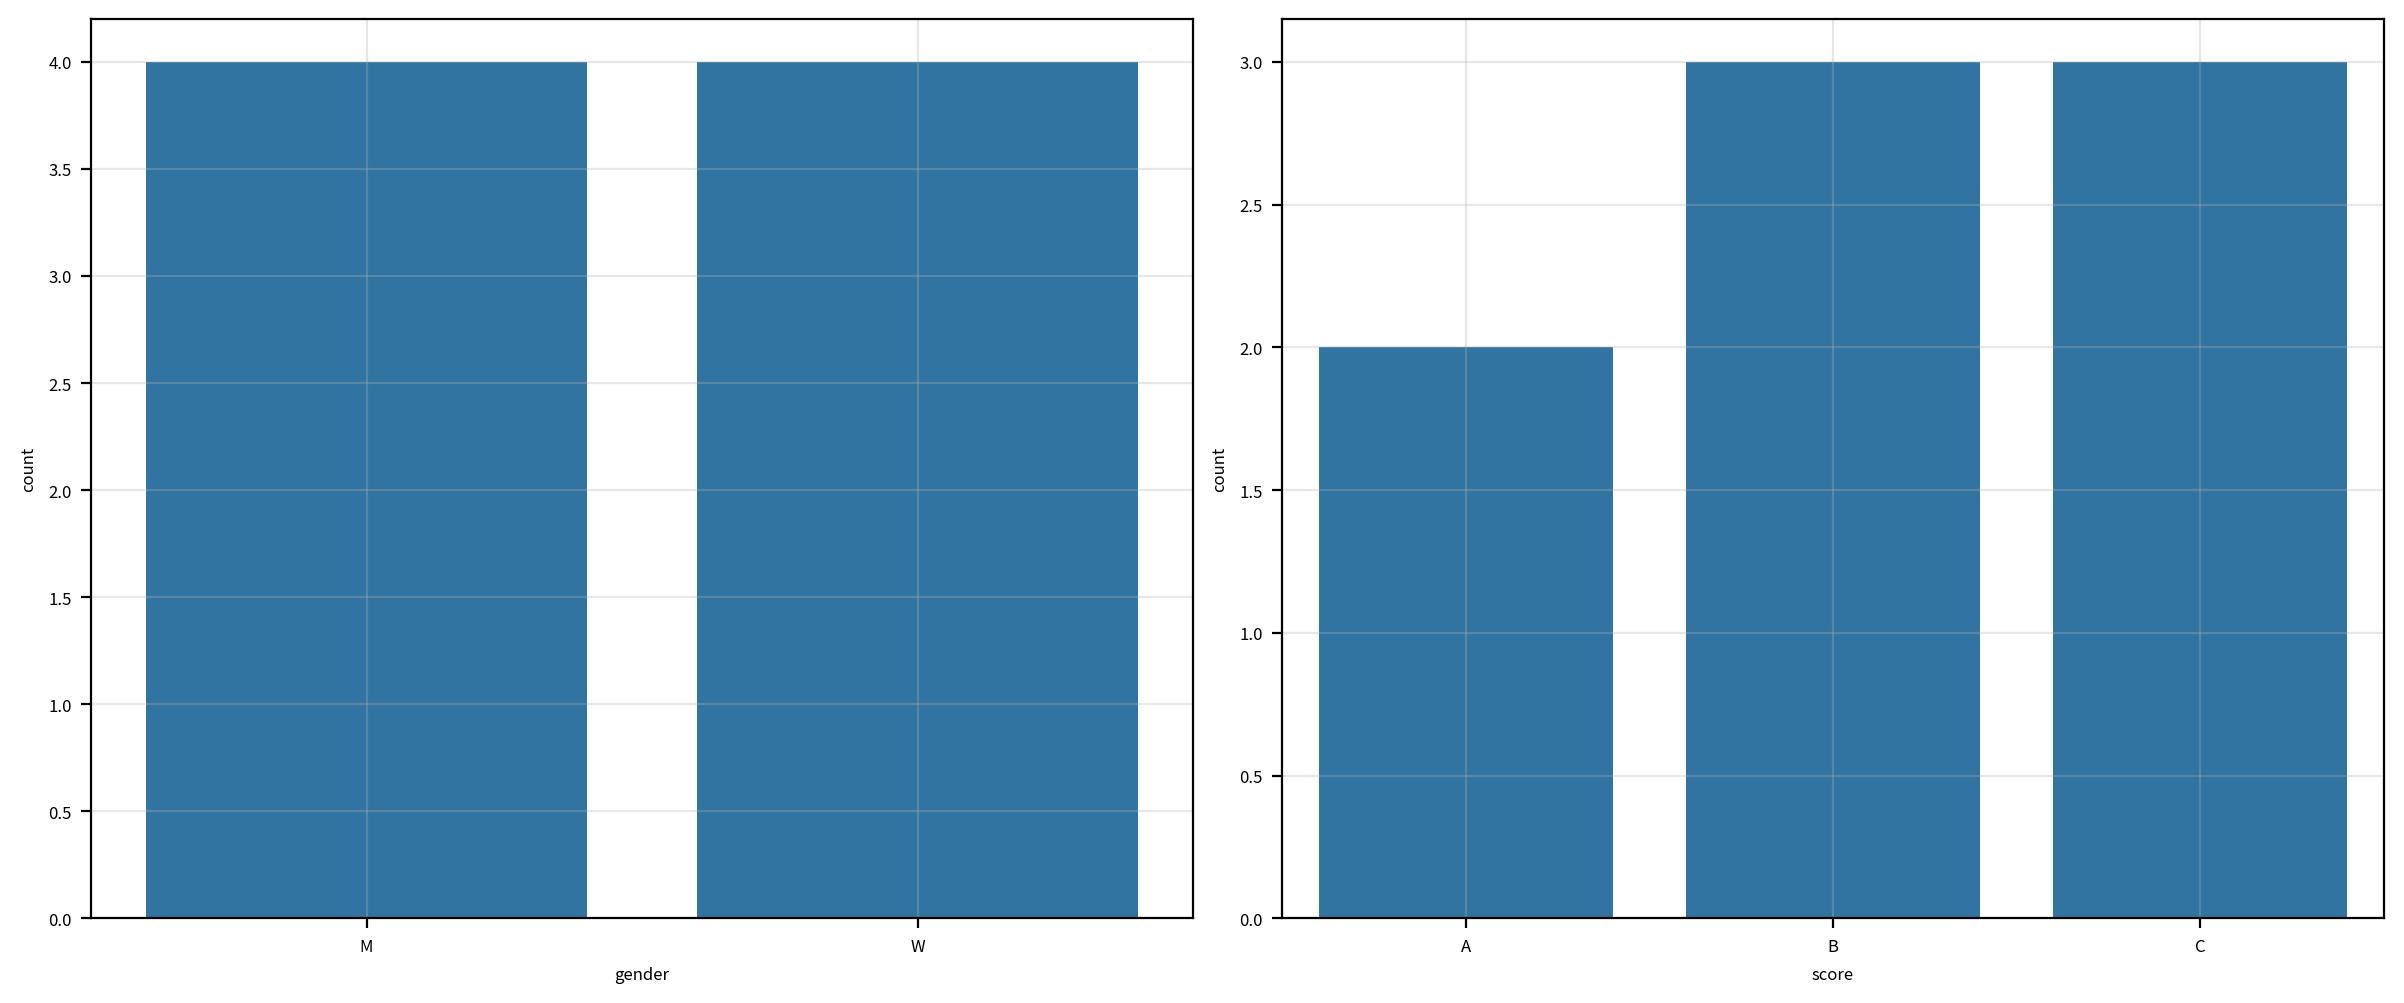

In [8]:
# subplot 이용해서 분할그래프 만들기

# 1) 그래프 초기화
width_px = 2400         # 그래프 가로 크기
height_px = 1000        # 그래프 세로 크기
rows = 1                # 그래프 행 수 ≠ 1
cols = 2                # 그래프 열 수 ≠ 1
figsize = (width_px / my_dpi, height_px / my_dpi)

# ax 객체가 행, 열 수에 따른 리스트가 된다
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 + 꾸미기
for i, v in enumerate(df.columns):
    sb.countplot(data = df, x=v, ax = ax[i])
    ax[i].grid(True, alpha=0.3)

# 4) 출력
plt.tight_layout()      # 여백 제거
plt.show()              # 그래프 화면 출력
plt.close()             # 그래프 작업 종료

## #03. 교차표

- 두개 이상의 명목형 변수 간 관계 파악을 위해 다변량 형태로 요약한 표
- 이변량/다변량 분석에서 쓰임

### 교차표 사용 케이스:


### 1. 교차표 만들기:

| 파라미터 | 기능 | 필수여부
| --- | --- | --- |
| index | 교차표의 인덱스로 사용할 변수 지정 | ㅇ |
| columns | 교차표의 컬럼으로 사용할 변수 지정 | ㅇ |
| rownames | 인덱스 이름 설정 | x |
| colnames | 컬럼 이름 설정 | x |
| margins | 집계결과 포함여부 (True/False) | x |

In [9]:
cb1 = crosstab(index = df['gender'],
               columns = df['score'],
               rownames = ['성별'],
               colnames = ['점수'])
cb1

점수,A,B,C
성별,,,
M,1,2,1
W,1,1,2


### 2. 비율과 합계 표시

using parameters:
- 합계: `margins=True`
- 합계비율: `normalize=True` 

In [10]:
cb2 = crosstab(index = df['gender'],
               columns = df['score'],
               rownames = ['성별'],
               colnames = ['점수'],
               margins = True,
               normalize = True)
cb2

점수,A,B,C,All
성별,,,,
M,0.125,0.250,0.125,0.5
W,0.125,0.125,0.250,0.5
All,0.250,0.375,0.375,1.0


### 3. 교차표 시각화: use `Heatmap`

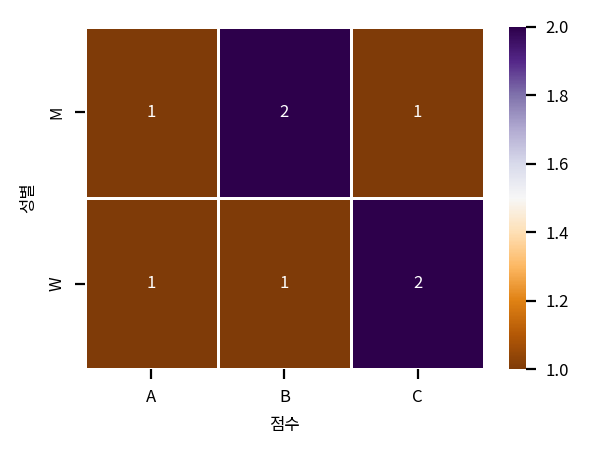

In [12]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 600             # 가로 = 세로 맞추기
height_px = 450            
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) Heatmap 그리기: seaborn 사용
sb.heatmap(data = cb1, annot=True, fmt='d', 
           linewidth = 0.5, cmap = "PuOr")
  # annot=True: 수치값을 함께 표시함
  # fmt: annot=True가 설정된 경우 표시되는 수치값의 형식 지정
  # linewidth: 각 셀 사이의 선 굵기
  # camp: 칼라맵 
    # 종류: 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds' / 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu' / 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn' / 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu' / 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic' / 'berlin', 'managua', 'vanimo'
  
# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

**인사이트:**
- 최빈 성적: 남성은 B, 여성은 C
- 점수 A는 성별과 무관
- 점수 분포 경향은 성별에 따라 뚜렷히 다름